# Se aplicará un algoritmos no supervisado Kmeans para agrupar los datos de la estadística utilizada. Se analizará con el resultado si las regiones son un buen separador de características considerando el análisis de ocurrencia de enfermedades 



In [122]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [123]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [124]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [125]:
#conjunto de datos sin las 3 columnas target y sin ID

X = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)

In [126]:

# Crear el modelo K-means con 6 clusters (tengo 6 regiones en el dataset)

kmeans = KMeans(n_clusters=6, random_state=0, n_init=10) # pueden probar con otros números


In [127]:
# Ajustar el modelo a los datos
kmeans.fit(X)


KMeans(n_clusters=6, n_init=10, random_state=0)

In [128]:
# Agrega los labels (clusters) generados al DataFrame original
df['Cluster'] = kmeans.labels_

In [129]:
# Ver la distribución de las regiones dentro de cada cluster
cluster_region_distribution = pd.crosstab(df['Cluster'], df['region'])
print(cluster_region_distribution)

region      1     2     3     4     5     6
Cluster                                    
0        1255  3255  1752  1531     2     0
1           6    14    21    21     2    14
2         381  1554   941   875   336   634
3           6    12     6     3     4     3
4           0     0     2   282  2006  2936
5        1589  3449  1935   807     3     0


In [130]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}




In [131]:
cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)
print(cluster_region_distribution)

region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
0                 1255      3255      1752     1531     2           0
1                    6        14        21       21     2          14
2                  381      1554       941      875   336         634
3                    6        12         6        3     4           3
4                    0         0         2      282  2006        2936
5                 1589      3449      1935      807     3           0


### si bien se observan alguna mayor cantidad de datos de cierta region en algunos clusters, es dificil comparar por el hecho que cada region tiene un npumero total de datos diferentes por lo que se hará la misma distribución de forma porcentua

In [132]:
# Calcula el total de datos en cada region
#total_por_cluster = cluster_region_distribution.sum(axis=1)
#print(total_por_cluster)

total_por_region =  cluster_region_distribution.sum(axis=0)
print(total_por_region)

region
Metropolitana    3237
Pampeana         8284
Noroeste         4657
Noreste          3519
Cuyo             2353
Patagónica       3587
dtype: int64


In [133]:

# Calcula el porcentaje de datos por región en cada cluster
#cluster_region_percentage = cluster_region_distribution.div(total_por_cluster, axis=0) * 100

region_percentage = cluster_region_distribution.div(total_por_region, axis=1) * 100
print(region_percentage)


region   Metropolitana   Pampeana   Noroeste    Noreste       Cuyo  Patagónica
Cluster                                                                       
0            38.770466  39.292612  37.620786  43.506678   0.084998    0.000000
1             0.185357   0.169000   0.450934   0.596760   0.084998    0.390298
2            11.770158  18.759054  20.206141  24.865018  14.279643   17.674937
3             0.185357   0.144858   0.128838   0.085251   0.169996    0.083635
4             0.000000   0.000000   0.042946   8.013640  85.252869   81.851129
5            49.088662  41.634476  41.550354  22.932651   0.127497    0.000000


### Se observa que por ejemplo la region cuyo y patagónica tienen un gran componente en le cluster 4, el cluster 5 tienen un gran compoennte de las regiones metropolitana, pampeana y noroeste y el otro componente lo tienen el cluster 0... luego el cluster 2 en menor medida. los cluster 3 y 1 tienen poca cantidadd de datos. 

### esto podría sugerir una mala distribución de clusters (tal vez menor o mayor cantidad). Se probará el método Elbow para encontrar una cantidad óptima de clusters




# Método Elbow

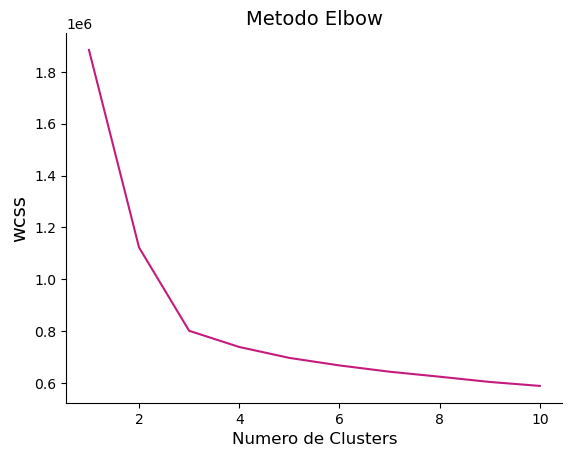

In [134]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

# Método Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    
    

In [137]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k,  n_init=10).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    
 

In [91]:
# Crear el modelo K-means con 3 clusters de acuerdo a lo indicado por Elbow

kmeans2 = KMeans(n_clusters=10, random_state=0, n_init=10) # pueden probar con otros números

# Ajustar el modelo a los datos
kmeans2.fit(X)

# Agrega los labels (clusters) generados al DataFrame original
df['Cluster'] = kmeans2.labels_

# Ver la distribución de las regiones dentro de cada cluster
cluster_region_distribution2 = pd.crosstab(df['Cluster'], df['region'])

cluster_region_distribution2 = cluster_region_distribution2.rename(columns=region_dict)
# Calcula el total de datos en cada cluster
total_por_region2 = cluster_region_distribution2.sum(axis=0)
# Calcula el porcentaje de datos por región en cada cluster
region_percentage2 = cluster_region_distribution2.div(total_por_region2, axis=1) * 100

print(region_percentage2 )

region   Metropolitana   Pampeana   Noroeste    Noreste       Cuyo  Patagónica
Cluster                                                                       
0            44.454742  36.950748  34.485720   0.000000   0.000000    0.000000
1             0.000000   0.000000   0.000000  26.058539  38.164046   48.146083
2             0.185357   0.169000   0.450934   0.596760   0.084998    0.390298
3             0.185357   0.144858   0.128838   0.085251   0.169996    0.083635
4             0.000000   0.000000   0.000000  39.641944  30.344241   28.937831
5            35.372258  34.898600  31.586858   0.000000   0.000000    0.000000
6             5.715168   6.904877  10.607687   6.564365   9.434764    5.659325
7            11.770158  18.746982  20.206141  24.751350  14.237144   14.106496
8             2.131603   2.088363   2.469401   2.216539   7.522312    2.369668
9             0.185357   0.096572   0.064419   0.085251   0.042499    0.306663


### En esta cantidad de clusters se observa cierta agrupación donde las primeras tres regiones coinciden en vari

In [105]:
# Obtener los labels de los clusters y los centroides
#labels = kmeans2.labels_
#centroids = kmeans2.cluster_centers_

In [106]:

# Crear un DataFrame con los datos y los labels de los clusters
#df['Cluster'] = labels


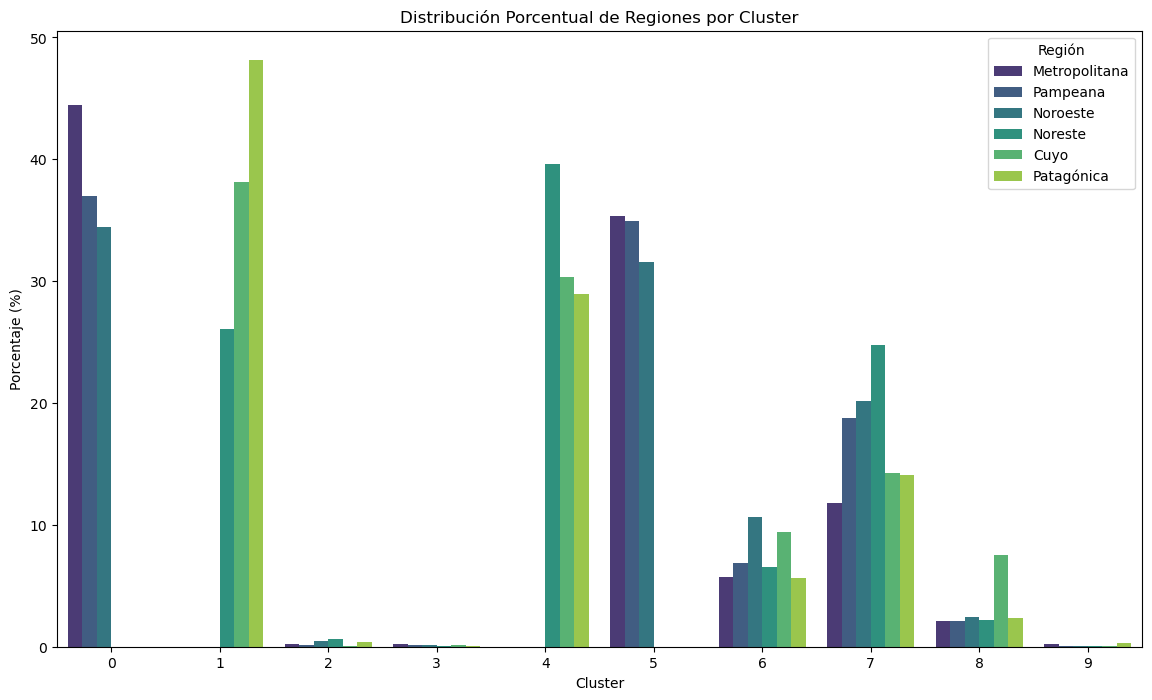

In [108]:
# Crear un gráfico de dispersión de las dos primeras características
#plt.figure(figsize=(12, 8))
#sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6, edgecolor=None)

# Agregar los centroides al gráfico
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides', edgecolor='k')

# Personalizar el gráfico
#plt.title('Scatter Plot de Datos con Centroides de Clusters')
#plt.xlabel('Característica 1')
#plt.ylabel('Característica 2')
#plt.legend()
#plt.show()

# Convertir los datos a formato largo para seaborn
region_percentage_long2 = region_percentage2.reset_index().melt(id_vars='Cluster', var_name='Region', value_name='Percentage')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(data=region_percentage_long2, x='Cluster', y='Percentage', hue='Region', palette='viridis')
plt.title('Distribución Porcentual de Regiones por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Región')
plt.show()





#  Se analizará la clusterización y los rangos de EDAD

In [92]:
from sklearn.preprocessing import KBinsDiscretizer

In [93]:
# Crear el discretizador
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

In [100]:

# Ajustar y transformar los datos
df['rango_edad'] = kbd.fit_transform(df[['edad']] )



C:\Users\diana\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [95]:
print(df['rango_edad'])

0        0.0
1        2.0
2        0.0
3        2.0
4        0.0
        ... 
25632    0.0
25633    2.0
25634    3.0
25635    1.0
25636    1.0
Name: rango_edad, Length: 25637, dtype: float64


In [96]:
df.columns

Index(['id', 'region', 'tamanio_aglomerado_2', 'tamanio_aglomerado_3',
       'tamanio_aglomerado_4', 'tipo_vivienda_2', 'tipo_vivienda_3',
       'tipo_vivienda_4', 'tipo_vivienda_5', 'tipo_vivienda_6',
       ...
       'dijeron_diabetes_99', 'familiares_directos_diabetes_2',
       'familiares_directos_diabetes_99', 'familiares_no_directos_diabetes_2',
       'familiares_no_directos_diabetes_99', 'dijeron_diabetes',
       'veces_presion_alta', 'colesterol_alto', 'Cluster', 'rango_edad'],
      dtype='object', length=103)

In [97]:
#muevo columnas de variables dependiendtes (enfermedades) al final d enuevo porque cluster y rango edad se crean al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

X3 = df.iloc[:, 1:-3]  

In [98]:
# Crear el modelo K-means con 12 clusters (tengo 6 regiones en el dataset)

kmeans3 = KMeans(n_clusters=10, random_state=0, n_init=10) # pueden probar con otros números

# Ajustar el modelo a los datos
kmeans3.fit(X3)

# Agrega los labels (clusters) generados al DataFrame original
df['Cluster'] = kmeans3.labels_

# Ver la distribución de las regiones dentro de cada cluster
cluster_edad_distribution3 = pd.crosstab(df['Cluster'], df['rango_edad'])


print(cluster_edad_distribution3 )

rango_edad   0.0   1.0   2.0   3.0
Cluster                           
0           1714  1885  1706   801
1             23    21    19    15
2              0   115  1857  1127
3           1044   597   250    46
4           2680  2630    77     0
5             14     7    10     3
6            865  1205  1108   919
7            252   237   157    49
8            161   187   159   155
9           1089  1079   973   401


### Se fueron variando el número de clusters y no se observa que el rango de edad defina tampoco la separacion.  Analizaremos otro modelo